# CS229: Problem Set 3
## Problem 5: K-means for Compression


**C. Combier**

This iPython Notebook provides solutions to Stanford's CS229 (Machine Learning, Fall 2017) graduate course problem set 3, taught by Andrew Ng.

The problem set can be found here: [./ps3.pdf](ps3.pdf)

I chose to write the solutions to the coding questions in Python, whereas the Stanford class is taught with Matlab/Octave.

## Notation

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

### Question 5.a)


Let's load and plot the original (large) image:

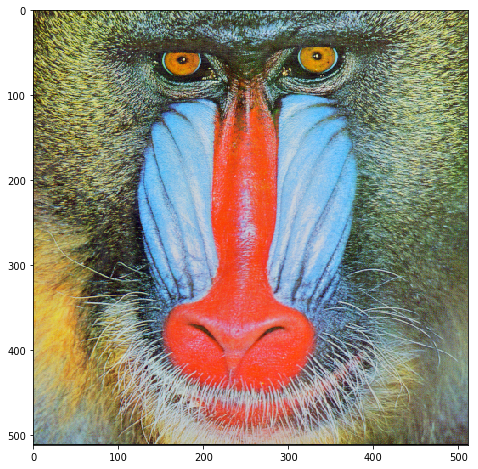

In [2]:
A = imread('data/mandrill-large.tiff')
plt.figure(figsize=(8,8))
plt.imshow(A);

### Question 5.b)

We'll be running the clustering on the smaller image to speed up convergence. The image is shown below:

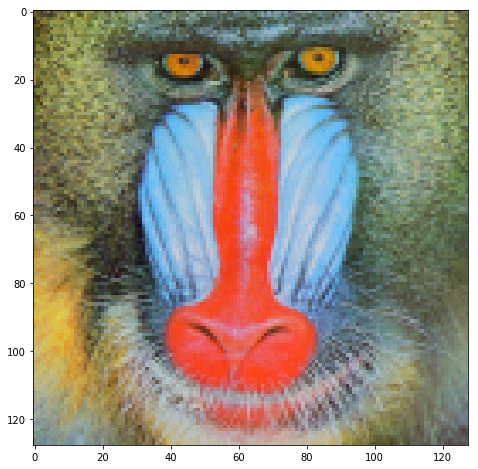

In [3]:
B = imread('data/mandrill-small.tiff')
plt.figure(figsize=(8,8))
plt.imshow(B);

We will now run K-means clustering on the pixels of this image. We run the loop for a minimum of 30 iterations, and use 16 clusters. The algorithm runs as follows:

1. Randomly pick 16 pixels from the image to initialize the centroids
2. Repeat until convergence:
    1. Assign each pixel from the image to the neareast centroid
    2. For each centroid, calculate the mean of all the pixels assigned to it
    3. Update the centroids to the mean calculated in step 2.
    
Here's the code for the k-means implementation:

In [4]:
def k_means(X, n_centroids=16, min_iter=30):
    C = X.reshape(-1,3)
    # Randomly initialize the centroids
    centroids = C[np.random.randint(0, C.shape[0], n_centroids)]
    error_history = []
    error = 1
    n_iter = 0
    
    # Loop until for at least min_iter and while the centroids are not stable
    while (error > 0 or n_iter < min_iter):
        # For each pixel, calculate the distance to all current centroids:
        norms = np.array([np.linalg.norm(C-centroids[k,:],2,1) for k in range(n_centroids)]).T
        # Assign each pixel to the closest centroid:
        assign = np.argmin(norms,1)
        # For a given centroid, calculate the mean of the pixels assigned to it:
        means = np.array([np.mean(C[np.where(assign == k)],0) for k in range(n_centroids)])
        # Check for stability of the centroids and keep track of the error history
        error = np.linalg.norm(centroids-means,1,1).sum()
        error_history.append(error)
        # Assign the new centroids as the means calculated previously:
        centroids = means
        n_iter += 1
        
    return centroids, error_history

In [5]:
centroids, error_history = k_means(B)

We can now plot the error history:

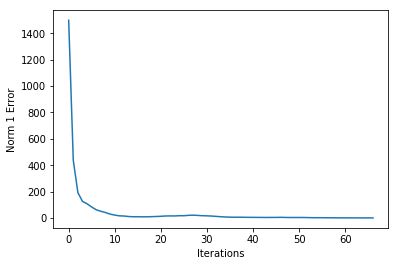

In [6]:
plt.plot(error_history);
plt.xlabel('Iterations');
plt.ylabel('Norm 1 Error');

Let's take a quick peek at the 16 color clusters that k-means has calculated:

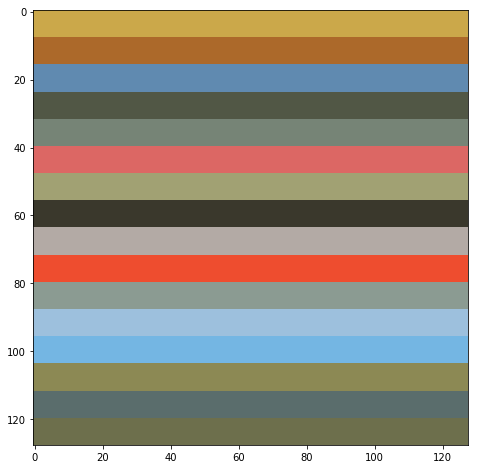

In [7]:
centroids = centroids.astype(int)
colormap = np.repeat(centroids,1024,0).reshape(128,128,3)
plt.figure(figsize=(8,8))
plt.imshow(colormap);

Looks like a color palette covering most of the colors of the image! So far so good.

### Question 5.c)

In this question, we'll be using the 16 clusters we've calculated previously to compress the large image of the mandrill. This is essentially equivalent to running step 2.A of the k-means algorithm.

Here's the code:

In [8]:
C = A.reshape(-1,3)
# For each pixel, calculate the distance to all current centroids:
norms = np.array([np.linalg.norm(C-centroids[k,:],2,1) for k in range(centroids.shape[0])]).T
# Assign each pixel to the closest centroid:
assign = np.argmin(norms,1)

# Create a new image where each pixel is the the centroid closest to the pixel in the original image
compressed_image = np.array([centroids[assign[k]] for k in range(assign.shape[0])])
compressed_image = compressed_image.reshape(512,512,3)

Now, let's plot the original large image of the Mandrill, and compare it to the compressed image we just generated:

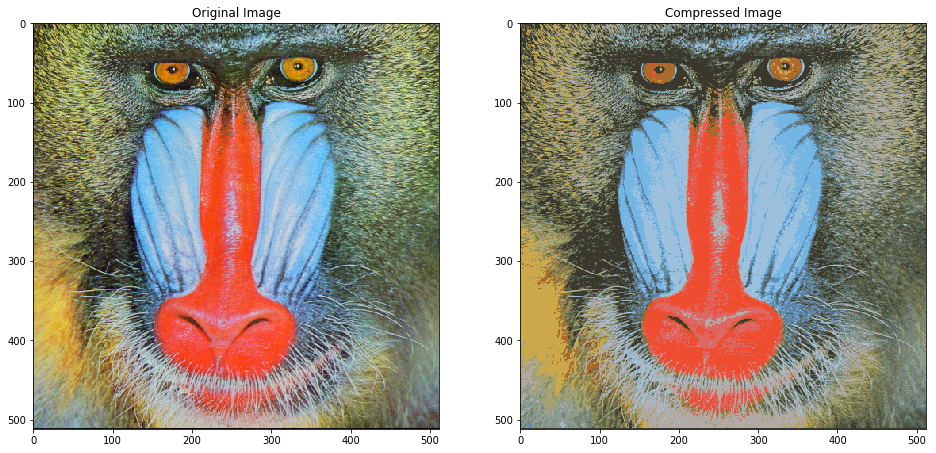

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax0, ax1 = axes.ravel()

ax0.imshow(A)
ax0.set_title('Original Image');
ax1.imshow(compressed_image)
ax1.set_title('Compressed Image');

The result is quite impressive!

### Question 5.d)

The original image is in RGB-256 format. Each pixel requires $\log_2 256 \times 3 = 24$ bits of memory to store. The compressed image only has 16 colors, therefore each pixel only requires $\log_2 16 = 4$ bits of memory. The overall compression factor is $24/4 = 6$, which is a fairly large amount. As can be seen from the images above, the compression process using k-means only results in minimal loss of detail in this example.